<a href="https://colab.research.google.com/github/Ayush310803/ViT/blob/main/HRNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-hub opencv-python matplotlib numpy

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
hrnet_model_name = "ade20k-hrnetv2-w48/1"
model_url = f"https://tfhub.dev/google/HRNet/{hrnet_model_name}"
model = hub.load(model_url)

print("✅ HRNet Model Loaded Successfully!")

✅ HRNet Model Loaded Successfully!


In [4]:
def segment_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)/255.0

    predictions = model.predict([img])
    predicted_mask = predictions[0, :, :, 1]

    return predicted_mask

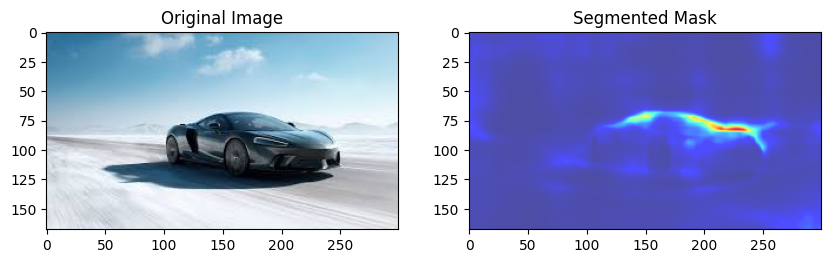

In [6]:
def visualize_segmentation(image_path):
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    segmented_mask = segment_image(image_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")

    axes[1].imshow(segmented_mask, cmap="jet", alpha=0.7)
    axes[1].set_title("Segmented Mask")

    plt.show()

visualize_segmentation("/content/download (1).jpeg")

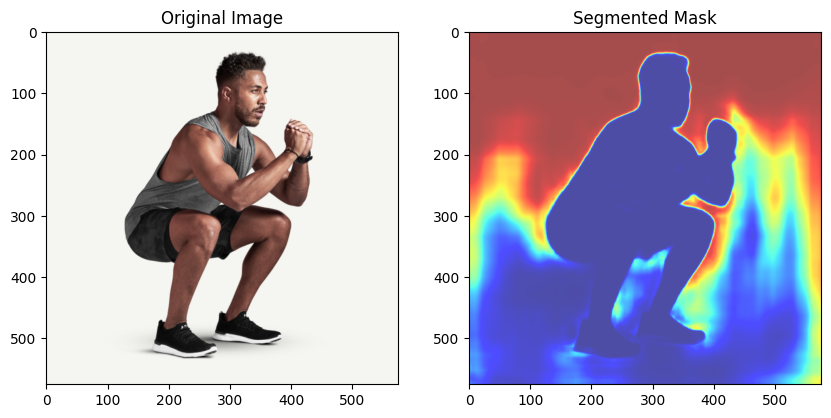

In [7]:
def visualize_segmentation(image_path):
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    segmented_mask = segment_image(image_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")

    axes[1].imshow(segmented_mask, cmap="jet", alpha=0.7)
    axes[1].set_title("Segmented Mask")

    plt.show()

visualize_segmentation("/content/Bodyweight-Squat.jpg")

In [8]:
import os
import zipfile
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

os.environ["KAGGLE_CONFIG_DIR"] = "/content"
!kaggle datasets download -d rajkumarl/people-clothing-segmentation

dataset_zip = "/content/people-clothing-segmentation.zip"
extract_path = "/content/dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully.")
!ls /content/dataset

image_dir = "/content/dataset/jpeg_images/IMAGES"
mask_dir = "/content/dataset/jpeg_masks/MASKS"
label_path = "/content/dataset/labels.csv"

Dataset URL: https://www.kaggle.com/datasets/rajkumarl/people-clothing-segmentation
License(s): CC0-1.0
 98% 605M/616M [00:06<00:00, 150MB/s]
100% 616M/616M [00:07<00:00, 91.9MB/s]
✅ Dataset extracted successfully.
 jpeg_images   jpeg_masks  'labels (1).csv'   labels.csv   png_images   png_masks


In [9]:
!pip install torch torchvision opencv-python matplotlib pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [12]:
import numpy as np
import cv2
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_paths, mask_paths, batch_size, input_size):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.batch_size = batch_size
        self.input_size = input_size

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = slice(index * self.batch_size, (index + 1) * self.batch_size)
        image_paths_batch = self.image_paths[indexes]
        mask_paths_batch = self.mask_paths[indexes]

        X, y = self.__data_generation(image_paths_batch, mask_paths_batch)
        return X, y

    def __data_generation(self, image_paths_batch, mask_paths_batch):
        X = np.empty((self.batch_size, *self.input_size, 3))
        y = np.empty((self.batch_size, *self.input_size, 1))

        for i, (image_path, mask_path) in enumerate(zip(image_paths_batch, mask_paths_batch)):
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, self.input_size)
            image = image / 255.0

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, self.input_size)
            mask = mask / 255.0
            mask = np.expand_dims(mask, axis=-1)

            X[i,] = image
            y[i,] = mask

        return X, y

In [14]:
image_dir = "/content/dataset/jpeg_images/IMAGES"
mask_dir = "/content/dataset/jpeg_masks/MASKS"

image_paths = sorted([os.path.join(image_dir, img) for img in os.listdir(image_dir)])
mask_paths = sorted([os.path.join(mask_dir, mask) for mask in os.listdir(mask_dir)])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(image_paths, mask_paths, test_size=0.2, random_state=42)

train_generator = DataGenerator(X_train, y_train, batch_size=8, input_size=(256, 256))
val_generator = DataGenerator(X_val, y_val, batch_size=8, input_size=(256, 256))

In [17]:
import tensorflow as tf

input_shape = (256, 256, 3)

class HRNetLayer(tf.keras.layers.Layer):
    def __init__(self, hrnet_model, **kwargs):
        super(HRNetLayer, self).__init__(**kwargs)
        self.hrnet_model = hrnet_model

    def call(self, inputs):
        return self.hrnet_model(inputs)

inputs = tf.keras.Input(shape=input_shape)
outputs = HRNetLayer(model)(inputs)
outputs = tf.keras.layers.Conv2D(filters=1, kernel_size=1, activation='sigmoid')(outputs)
fine_tuned_model = tf.keras.Model(inputs, outputs)
fine_tuned_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hr_net_layer (HRNetLayer)            │ (None, None, None, 151)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, None, None, 1)       │             152 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152 (608.00 B)

 Trainable params: 152 (608.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
fine_tuned_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=2)]
)

In [ ]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = fine_tuned_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 44/100 ━━━━━━━━━━━━━━━━━━━━ 7:34 8s/step - accuracy: 0.2301 - loss: 0.7164 - mean_io_u: 1.0000